# Project: "Customer Spending Analysis across Regions using Python"

##  Objective: Analyze customer spending data from different regions over the year. You'll extract insights such as:
#### Q1: Total & average spending per region
#### Q2: Detect regional trends and seasonal spikes
#### Q3: Compute correlations between regions
#### Q4: Month-over-Month Growth by Region
#### Q5: Identify months with unusual patterns (Z-score normalization for anomaly detection)

In [1]:
# Importing relevant libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
data = pd.read_csv('Customer_Spending_Data.csv')
data

,Month,North,South,East,West
0,Jan,1200,1500,1100,1300
1,Feb,1250,1450,1150,1350
2,Mar,1300,1480,1200,1400
3,Apr,1350,1490,1250,1450
4,May,1400,1500,1300,1500
5,Jun,1450,1520,1350,1600
6,Jul,1500,1550,1400,1650
7,Aug,1550,1600,1450,1700
8,Sep,1600,1620,1500,1750
9,Oct,1650,1650,1550,1800


In [3]:
# Preparing the data
months = data['Month'].values
regions = data.columns[1:]
regions_data = data.drop(columns = 'Month').values

print(months)
print(regions)
print(regions_data)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Index(['North', 'South', 'East', 'West'], dtype='object')
[[1200 1500 1100 1300]
 [1250 1450 1150 1350]
 [1300 1480 1200 1400]
 [1350 1490 1250 1450]
 [1400 1500 1300 1500]
 [1450 1520 1350 1600]
 [1500 1550 1400 1650]
 [1550 1600 1450 1700]
 [1600 1620 1500 1750]
 [1650 1650 1550 1800]
 [1700 1700 1600 1900]
 [1750 1750 1650 2000]]


In [4]:
# Q1
total = np.sum(regions_data, axis = 0)
avg = np.mean(regions_data, axis = 0)

for i, region in enumerate(regions):
    print(f"{region}:- Total: ${total[i]}; Average: ${avg[i]:.2f}")

North:- Total: $17700; Average: $1475.00
South:- Total: $18810; Average: $1567.50
East:- Total: $16500; Average: $1375.00
West:- Total: $19400; Average: $1616.67


In [5]:
# Q2: Highest
month_max = months[np.argmax(regions_data, axis = 0)]
month_min = months[np.argmin(regions_data, axis = 0)]

for i, region in enumerate(regions):
    print(f"{region}:- Highest in {month_max[i]}; Lowest in {month_min[i]}")

North:- Highest in Dec; Lowest in Jan
South:- Highest in Dec; Lowest in Feb
East:- Highest in Dec; Lowest in Jan
West:- Highest in Dec; Lowest in Jan


In [6]:
# Q3: Trend similarity 
correlation = np.corrcoef(regions_data.T)

print("Correlation between regions:")
print(correlation)

Correlation between regions:
[[1.         0.94507918 1.         0.99529852]
 [0.94507918 1.         0.94507918 0.95933055]
 [1.         0.94507918 1.         0.99529852]
 [0.99529852 0.95933055 0.99529852 1.        ]]


In [7]:
# Q4
change = np.diff(regions_data, axis = 0)

#print(change)

print("Month over Month Change: \n")
for i, region in enumerate(regions):
    print(f"{region}:- ")
    for j in range(len(change)):
        print(f"{months[j]} -> {months[j+1]}: {change[j][i]}")

Month over Month Change: 

North:- 
Jan -> Feb: 50
Feb -> Mar: 50
Mar -> Apr: 50
Apr -> May: 50
May -> Jun: 50
Jun -> Jul: 50
Jul -> Aug: 50
Aug -> Sep: 50
Sep -> Oct: 50
Oct -> Nov: 50
Nov -> Dec: 50
South:- 
Jan -> Feb: -50
Feb -> Mar: 30
Mar -> Apr: 10
Apr -> May: 10
May -> Jun: 20
Jun -> Jul: 30
Jul -> Aug: 50
Aug -> Sep: 20
Sep -> Oct: 30
Oct -> Nov: 50
Nov -> Dec: 50
East:- 
Jan -> Feb: 50
Feb -> Mar: 50
Mar -> Apr: 50
Apr -> May: 50
May -> Jun: 50
Jun -> Jul: 50
Jul -> Aug: 50
Aug -> Sep: 50
Sep -> Oct: 50
Oct -> Nov: 50
Nov -> Dec: 50
West:- 
Jan -> Feb: 50
Feb -> Mar: 50
Mar -> Apr: 50
Apr -> May: 50
May -> Jun: 100
Jun -> Jul: 50
Jul -> Aug: 50
Aug -> Sep: 50
Sep -> Oct: 50
Oct -> Nov: 100
Nov -> Dec: 100


In [8]:
# Q5: Detect Anomalies (Unusual Spikes or Drops)

z_scores = (regions_data - np.mean(regions_data, axis=0)) / np.std(regions_data, axis=0)
anomalies = np.where(np.abs(z_scores) > 2)

for row, col in zip(*anomalies):
    print(f"Unusual spending in {months[row]} for {regions[col]}: ${regions_data[row, col]}")

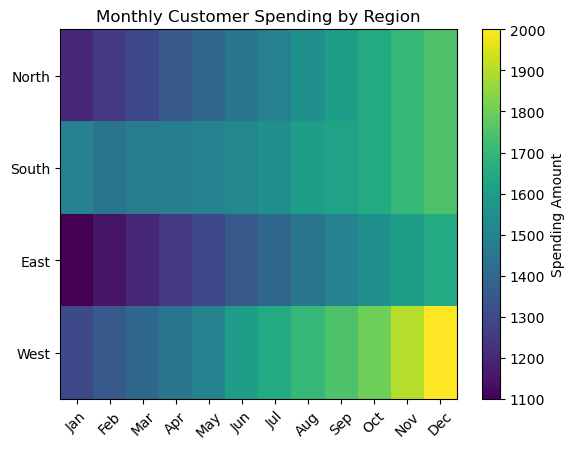

In [10]:
# Plotting: Heatmap

plt.imshow(regions_data.T, cmap='viridis', aspect='auto')
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=45)
plt.yticks(ticks=np.arange(len(regions)), labels=regions)
plt.colorbar(label='Spending Amount')
plt.title("Monthly Customer Spending by Region")
plt.show()